In [1]:
import pandas as pd
df=pd.read_csv(r'HR Analytics Job Change of Data Scientists.csv')
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [2]:
df.shape

(19158, 14)

In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [6]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [7]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

1. What is the average training hours by gender, and how can we visualize it using a bar plot?

In [8]:
average_training_hours=df.groupby(['gender'])['training_hours'].mean()
average_training_hours

gender
Female    65.636511
Male      65.364206
Other     63.869110
Name: training_hours, dtype: float64

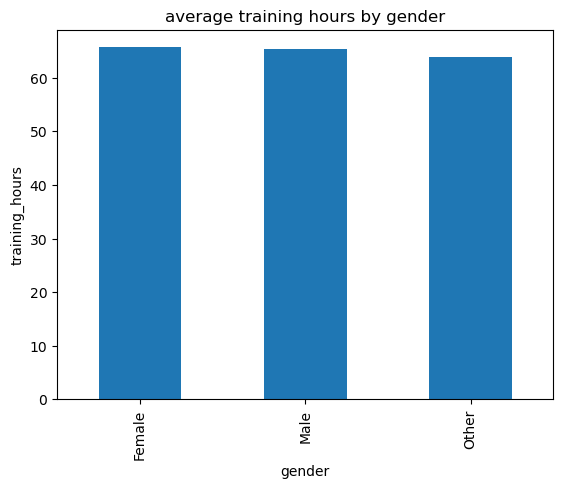

In [9]:
import matplotlib.pyplot as plt
average_training_hours.plot(kind='bar')
plt.rcParams['figure.figsize']=(5,5)
plt.xlabel('gender')
plt.ylabel('training_hours')
plt.title('average training hours by gender')
plt.show()

2. Visualize standard deviation of training hours by education level using a seaborn barplot.

In [10]:
std_hours=df.groupby(['education_level'])['training_hours'].std().reset_index()
std_hours

,education_level,training_hours
0,Graduate,60.548965
1,High School,59.307288
2,Masters,57.955434
3,Phd,66.743324
4,Primary School,64.889434


<Axes: xlabel='education_level', ylabel='training_hours'>

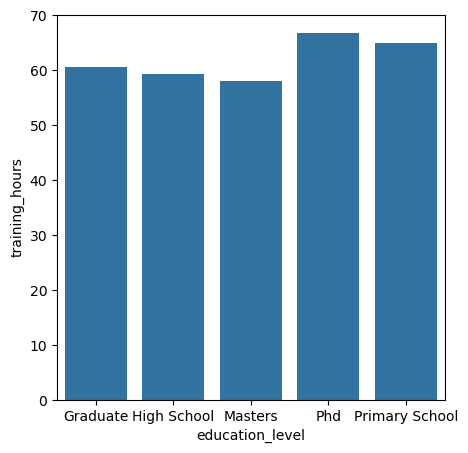

In [11]:
import seaborn as sns 
sns.barplot(data=std_hours, x='education_level', y='training_hours')

3. Display and plot the count of people by gender and company type using unstack + heatmap.

In [12]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
z=df.groupby(['gender','company_type'])['gender'].value_counts().unstack()
z

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
gender,,,,,,
Female,41,92,54,12,97,942
Male,559,897,463,108,849,14853
Other,3,12,4,1,9,162


Text(0.5, 1.0, 'Gender vs Company Type')

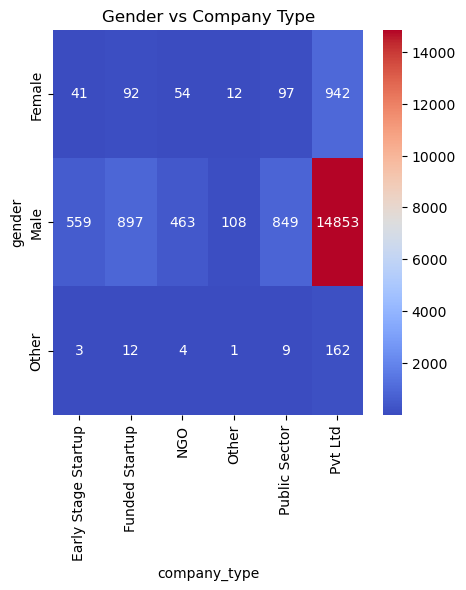

In [14]:
sns.heatmap(z, annot=True, fmt='d', cmap='coolwarm')
plt.title('Gender vs Company Type')

4. Create a pivot table of average training hours by education level and gender, then heatmap it.

In [15]:
pivot_table=df.pivot_table(index='education_level', columns='gender', values='training_hours', aggfunc='mean')
pivot_table

gender,Female,Male,Other
education_level,,,
Graduate,66.295775,65.845375,65.950413
High School,63.970149,66.845070,62.636364
Masters,64.793510,63.184731,56.888889
Phd,66.638298,67.506887,79.500000
Primary School,24.500000,64.432886,49.666667


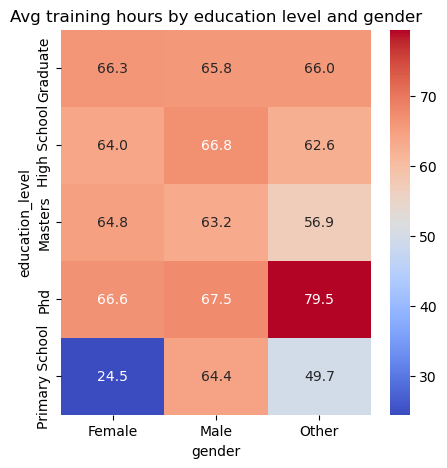

In [16]:
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Avg training hours by education level and gender')
plt.show()

5. Use a crosstab to analyze enrolled university vs education level, and visualize with bar plot.

In [17]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [18]:
cross_tab = pd.crosstab(df['enrolled_university'], df['education_level'])
cross_tab

education_level,Graduate,High School,Masters,Phd,Primary School
enrolled_university,,,,,
Full time course,2278,864,557,25,33
Part time course,805,166,204,12,11
no_enrollment,8975,987,3600,377,264


Text(0.5, 1.0, 'enrolled university vs education level')

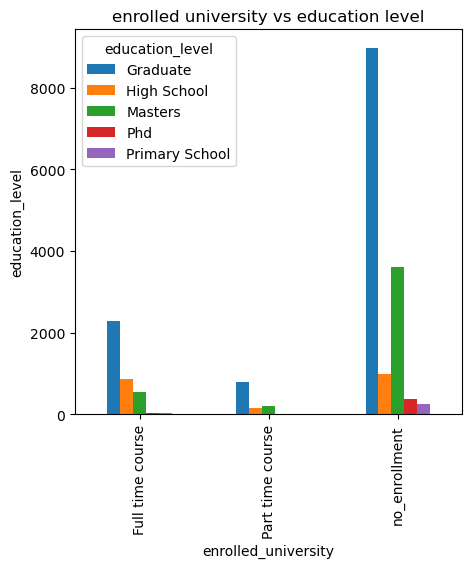

In [19]:
cross_tab.plot(kind='bar')
plt.ylabel('education_level')
plt.title('enrolled university vs education level')

6. Show and plot average city development index by company size.

In [20]:
g=df.groupby(['company_size'])['city_development_index'].mean().reset_index()
g

,company_size,city_development_index
0,10/49,0.813927
1,100-500,0.835129
2,1000-4999,0.857128
3,10000+,0.846206
4,50-99,0.820013
5,500-999,0.836881
6,5000-9999,0.849064
7,<10,0.824622


Text(0.5, 1.0, 'average city development index by company size')

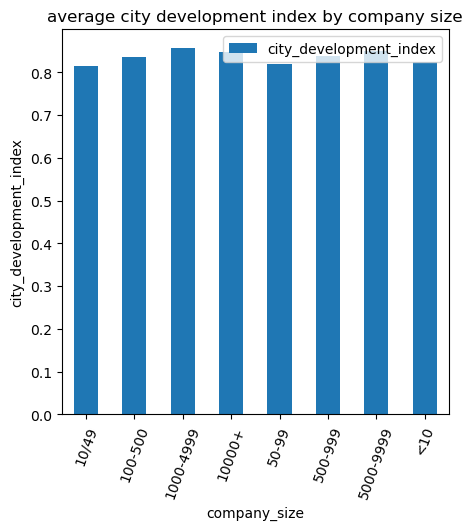

In [21]:
g.plot(kind='bar', x='company_size', y='city_development_index')
plt.rcParams['figure.figsize']=(10,8)
plt.xticks(rotation=70)
plt.xlabel('company_size')
plt.ylabel('city_development_index')
plt.title('average city development index by company size')

7. Use sort_index() to plot training hours by company size.

In [22]:
h=df.groupby(['company_size'])['training_hours'].mean().sort_index(ascending=True)
h

company_size
10/49        66.925901
100-500      63.984442
1000-4999    64.621235
10000+       64.523526
50-99        65.898903
500-999      64.282782
5000-9999    64.543517
<10          65.801988
Name: training_hours, dtype: float64

Text(0.5, 1.0, 'Training hours by company size')

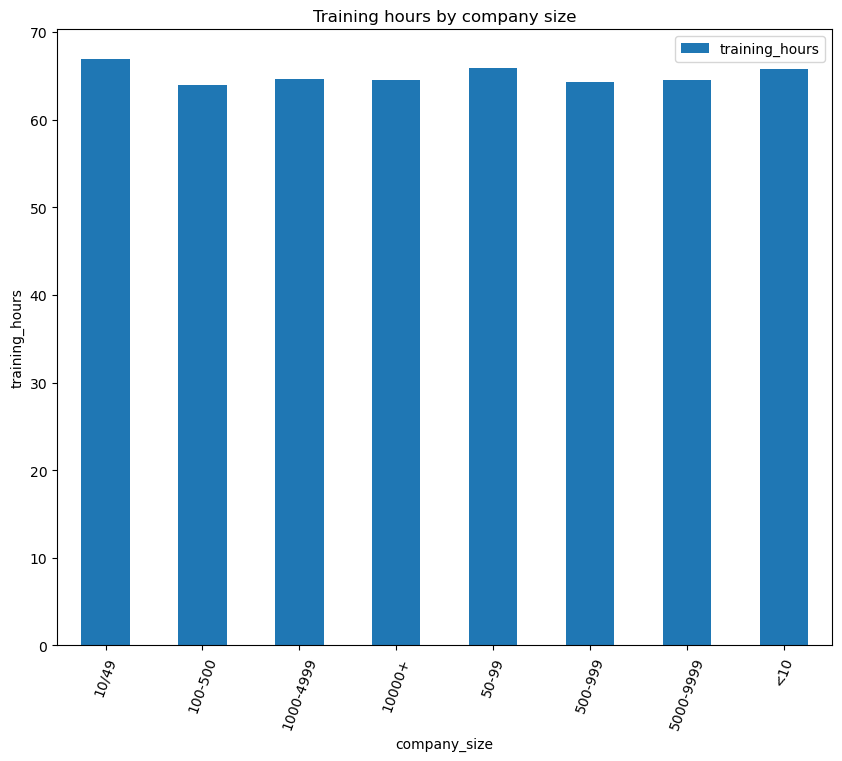

In [23]:
h.plot(kind='bar', x='company_size', y='training_hours',legend=True)
plt.rcParams['figure.figsize']=(5,5)
plt.xticks(rotation=70)
plt.xlabel('company_size')
plt.ylabel('training_hours')
plt.title('Training hours by company size')

8. Plot standard deviation of city development index by last_new_job using seaborn.

In [24]:
df['city_development_index'].dtype

dtype('float64')

In [25]:
s=df.groupby(['last_new_job'])['city_development_index'].std().reset_index()
s

,last_new_job,city_development_index
0,1,0.127679
1,2,0.118941
2,3,0.111547
3,4,0.109121
4,>4,0.097325
5,never,0.135159


Text(0.5, 1.0, 'City development index by last_new_job')

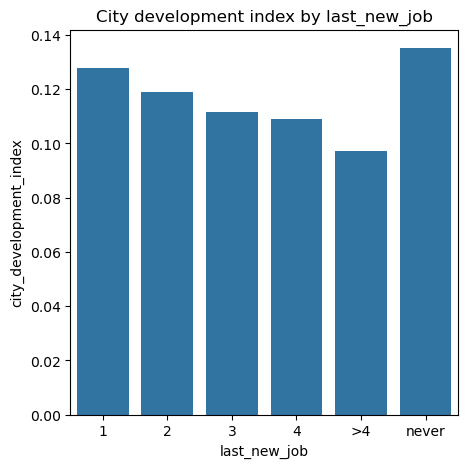

In [26]:
sns.barplot(data=s, x='last_new_job', y='city_development_index')
plt.title('City development index by last_new_job')

In [27]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

9. Count people who changed jobs (target=1) by gender and visualize.

In [28]:
t=df.groupby(['gender'])['target'].apply(lambda x: (x == '1').count())
t

gender
Female     1238
Male      17729
Other       191
Name: target, dtype: int64

Text(0.5, 1.0, 'people who changed jobs (target=1) by gender')

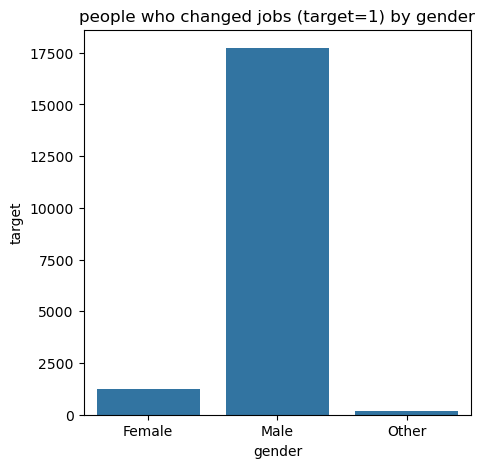

In [29]:
sns.barplot(data=t)
plt.title('people who changed jobs (target=1) by gender')

10. Heatmap of job change rate by major discipline and education level (pivot + heatmap).

In [30]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [31]:
pivot_table=pd.pivot_table(df, values='target', index='major_discipline', columns='education_level')
pivot_table

education_level,Graduate,High School,Masters,Phd,Primary School
major_discipline,,,,,
Arts,0.182692,NaN,0.333333,0.333333,NaN
Business Degree,0.268908,NaN,0.255814,0.000000,NaN
Humanities,0.230952,NaN,0.177778,0.166667,NaN
No Major,0.257732,NaN,0.172414,NaN,NaN
Other,0.305147,NaN,0.180000,0.111111,NaN
STEM,0.281279,0.19534,0.215519,0.138667,0.133117


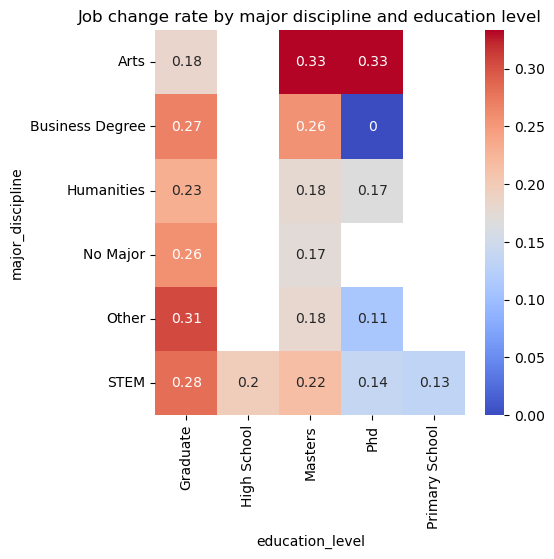

In [32]:
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Job change rate by major discipline and education level')
plt.show()

11. Crosstab of experience vs target, plotted as stacked bar.

In [33]:
cross_tab = pd.crosstab(df['experience'], df['target']).reset_index()
cross_tab

target,experience,0.0,1.0
0,1,316,233
1,10,778,207
2,11,513,151
3,12,402,92
4,13,322,77
5,14,479,107
6,15,572,114
7,16,436,72
8,17,285,57
9,18,237,43


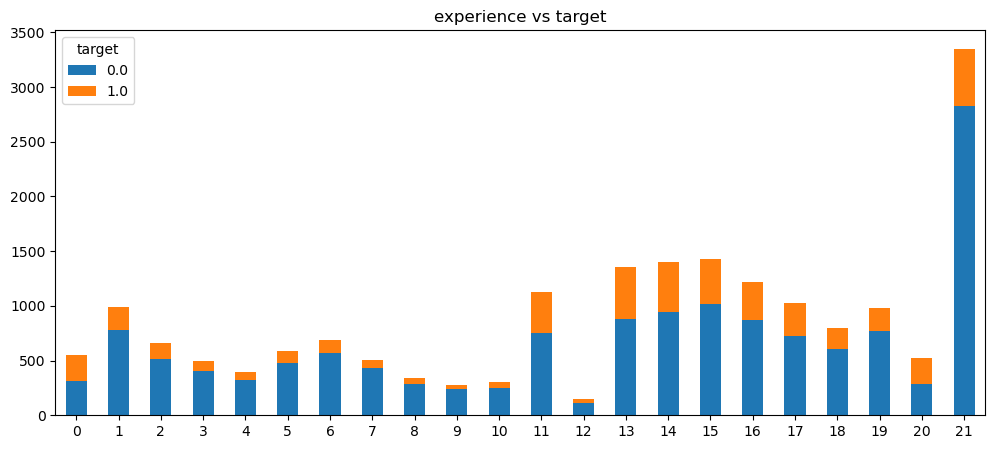

In [34]:
cross_tab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.xticks(rotation=0)
plt.title('experience vs target')
plt.show()

12. Group by company_type and education_level using unstack, then show as heatmap.

<Axes: xlabel='education_level', ylabel='company_type'>

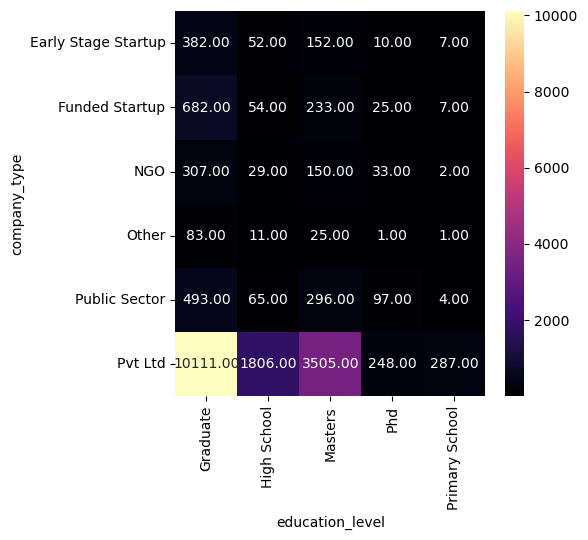

In [35]:
v=df.groupby(['company_type', 'education_level']).size().unstack()
sns.heatmap(v, annot=True, fmt='.2f', cmap='magma')

13. Pivot: training_hours by last_new_job and gender, then heatmap.

In [36]:
pivot_table=pd.pivot_table(df, values='training_hours', index='last_new_job', columns='gender')
pivot_table

gender,Female,Male,Other
last_new_job,,,
1,64.104651,65.904860,65.216867
2,67.619792,65.800224,51.920000
3,71.612903,64.560000,70.500000
4,66.597015,66.181532,47.777778
>4,67.559585,64.127687,62.814815
never,63.467213,64.669717,71.885714


<Axes: xlabel='gender', ylabel='last_new_job'>

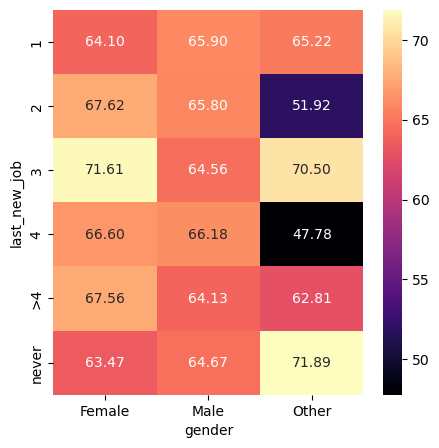

In [37]:
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='magma')

14. Normalized crosstab of company_size vs target with seaborn barplot.

In [38]:
cross_tab = pd.crosstab(df['company_size'], df['target']).reset_index()
cross_tab

target,company_size,0.0,1.0
0,10/49,1127,344
1,100-500,2156,415
2,1000-4999,1128,200
3,10000+,1634,385
4,50-99,6066,2955
5,500-999,725,152
6,5000-9999,461,102
7,<10,1084,224


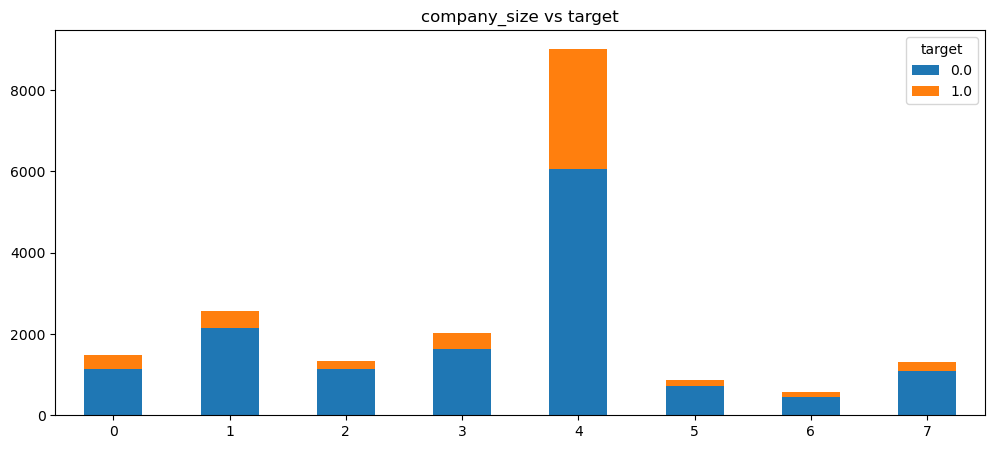

In [39]:
cross_tab.plot(kind='bar', stacked=True, figsize=(12,5))
plt.xticks(rotation=0)
plt.title('company_size vs target')
plt.show()

15. Plot standard deviation of training_hours by company_type.

In [40]:
sd=df.groupby(['company_type'])['training_hours'].std().reset_index()
sd

,company_type,training_hours
0,Early Stage Startup,63.257722
1,Funded Startup,61.016137
2,NGO,64.469137
3,Other,59.942194
4,Public Sector,56.681681
5,Pvt Ltd,59.916391


Text(0.5, 1.0, 'STD of Training_hours by Company_type')

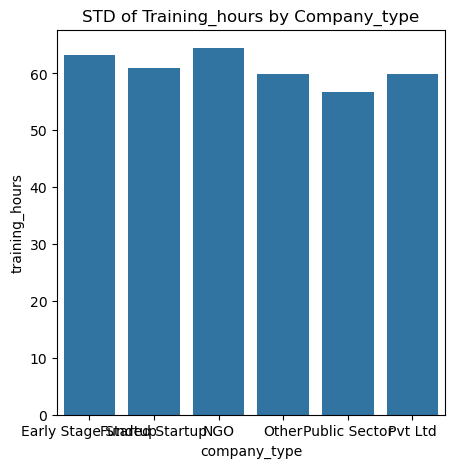

In [41]:
sns.barplot(data=sd, x='company_type', y='training_hours')
plt.rcParams['figure.figsize']=[20,8]
plt.title('STD of Training_hours by Company_type')

16. Plot mean city development index by gender and education level using heatmap.

In [42]:
m=df.groupby(['gender','education_level'])['city_development_index'].mean().unstack()
m

education_level,Graduate,High School,Masters,Phd,Primary School
gender,,,,,
Female,0.843763,0.829522,0.842811,0.894489,0.869250
Male,0.821109,0.833515,0.835020,0.883468,0.849265
Other,0.865785,0.864545,0.886889,0.712750,0.895167


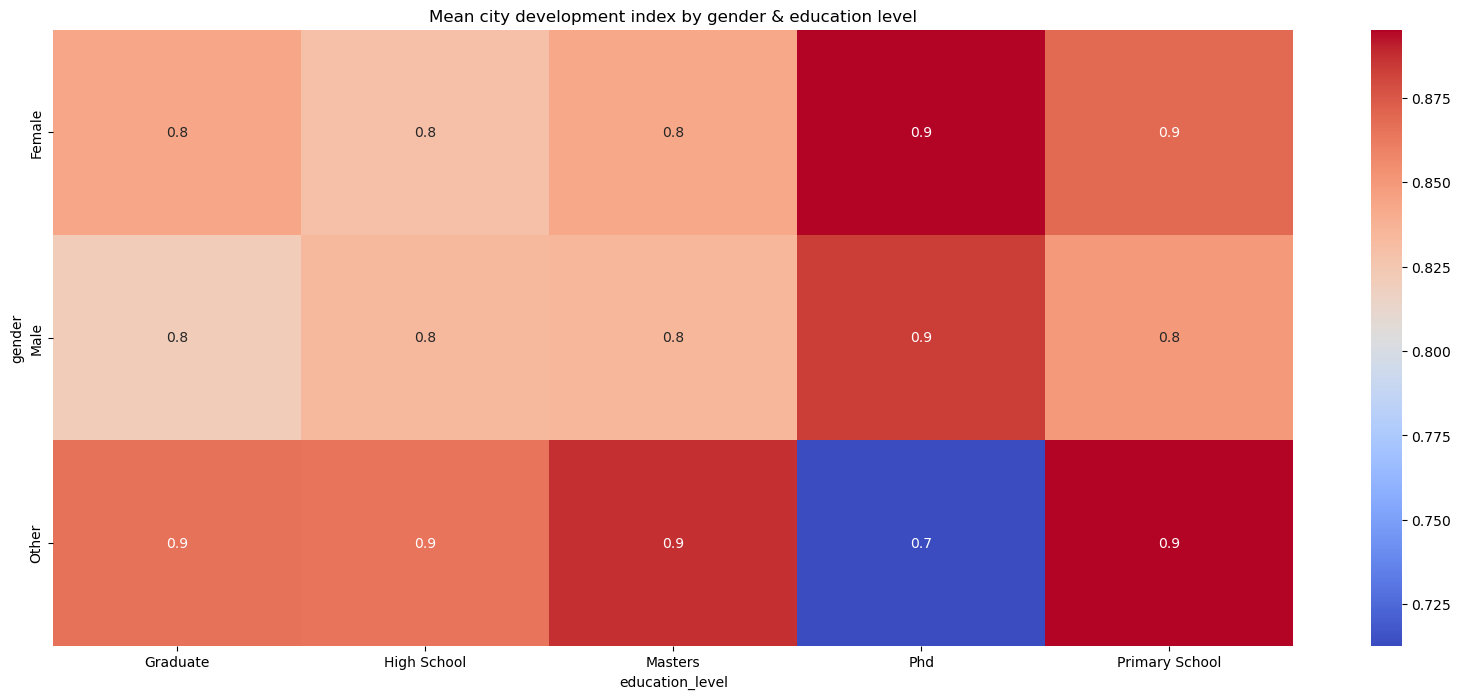

In [43]:
sns.heatmap(m, annot=True, fmt='0.1f', cmap='coolwarm')
plt.title('Mean city development index by gender & education level')
plt.show()

17. Median training_hours by university and gender, visualized

In [44]:
median=df.groupby(['enrolled_university','gender'])['training_hours'].median().unstack()
median

gender,Female,Male,Other
enrolled_university,,,
Full time course,51.0,46.0,40.5
Part time course,45.0,47.0,58.0
no_enrollment,48.0,47.0,48.0


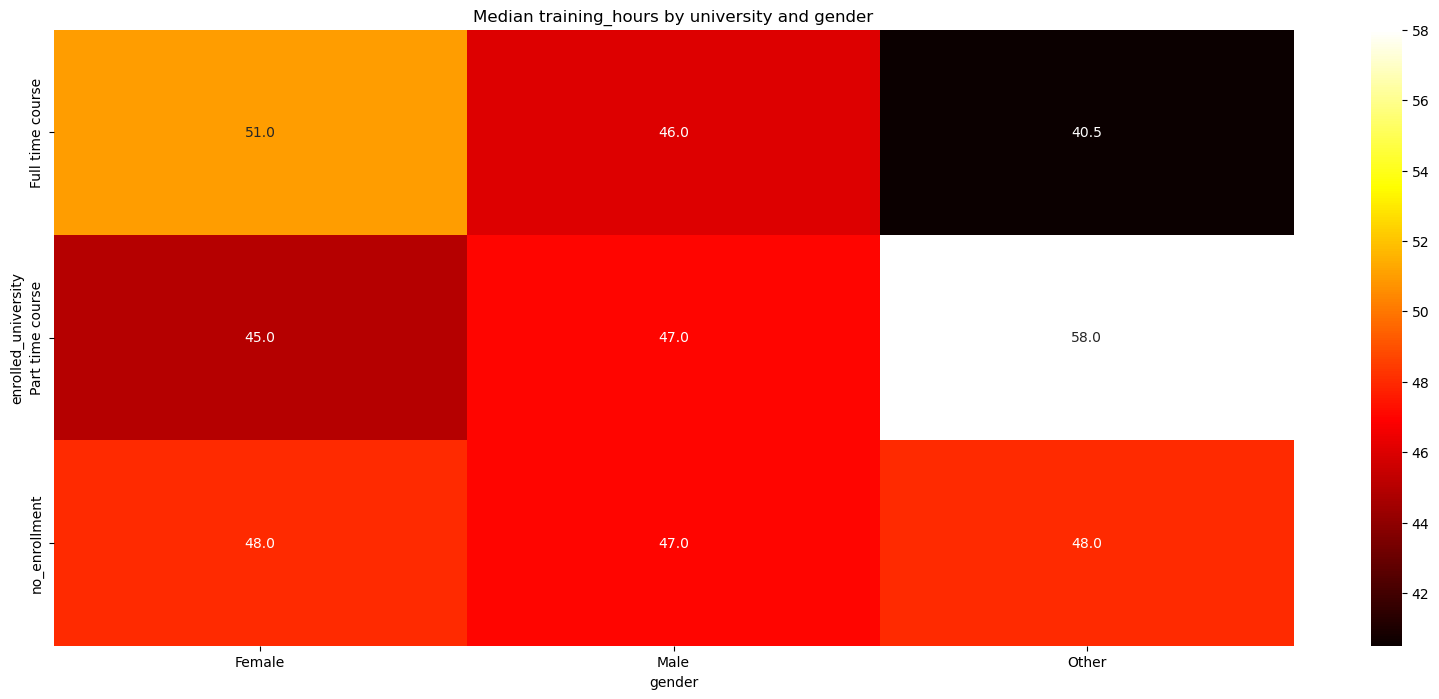

In [45]:
sns.heatmap(median, annot=True, fmt='0.1f', cmap='hot')
plt.title('Median training_hours by university and gender')
plt.show()

18. Crosstab: company_type vs last_new_job with stacked bar plot.

In [46]:
cross_tabs = pd.crosstab(df['company_type'], df['last_new_job']).reset_index()
cross_tabs

last_new_job,company_type,1,2,3,4,>4,never
0,Early Stage Startup,382,90,22,27,30,52
1,Funded Startup,612,194,55,56,65,19
2,NGO,271,65,26,28,108,23
3,Other,53,19,6,4,31,8
4,Public Sector,376,191,73,48,215,52
5,Pvt Ltd,6769,2341,842,866,2841,2298


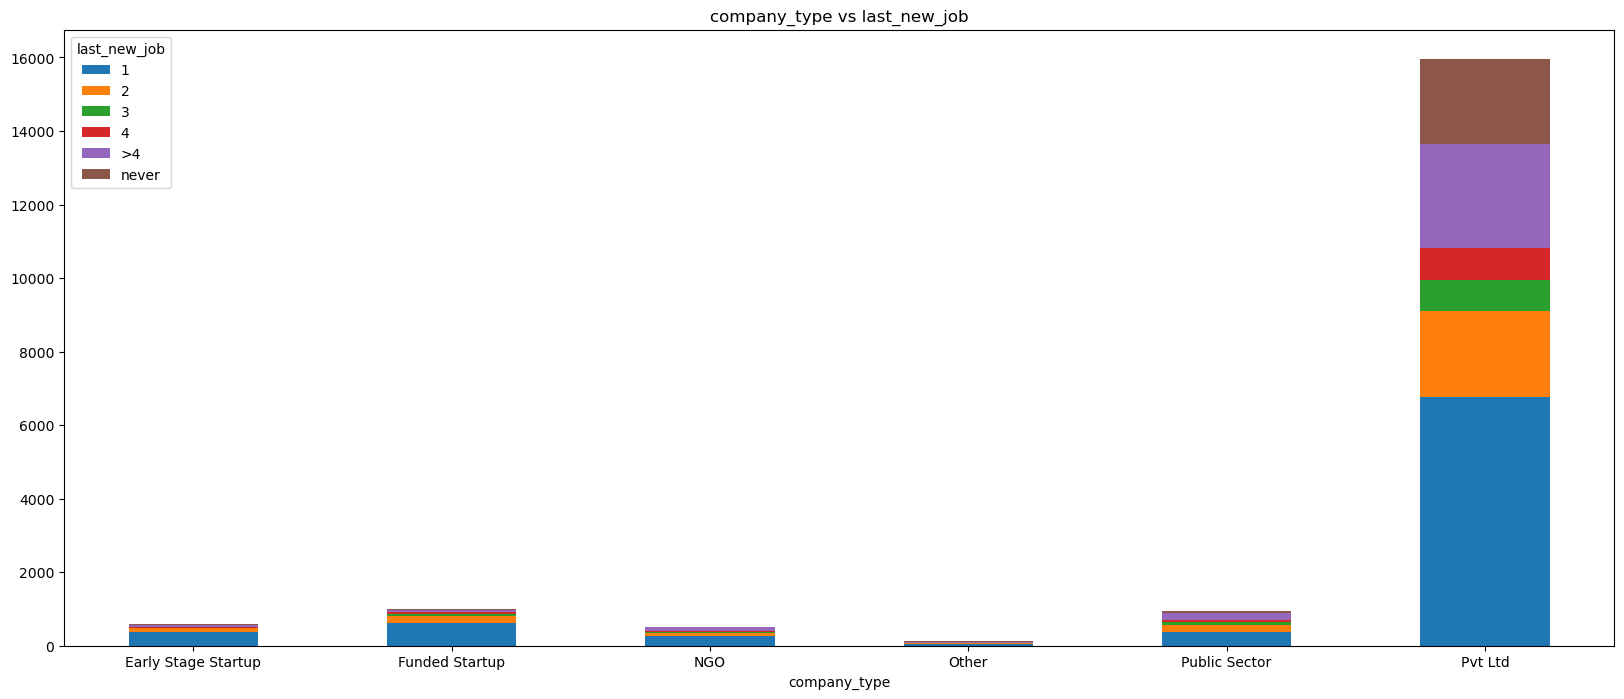

In [47]:
cross_tabs.plot(kind='bar', x='company_type',stacked=True)
plt.xticks(rotation=0)
plt.title('company_type vs last_new_job')
plt.show()

19. Maximum training_hours by gender plotted with barplot.

In [48]:
max=df.groupby(['gender'])['training_hours'].max()
max

gender
Female    332
Male      336
Other     306
Name: training_hours, dtype: int64

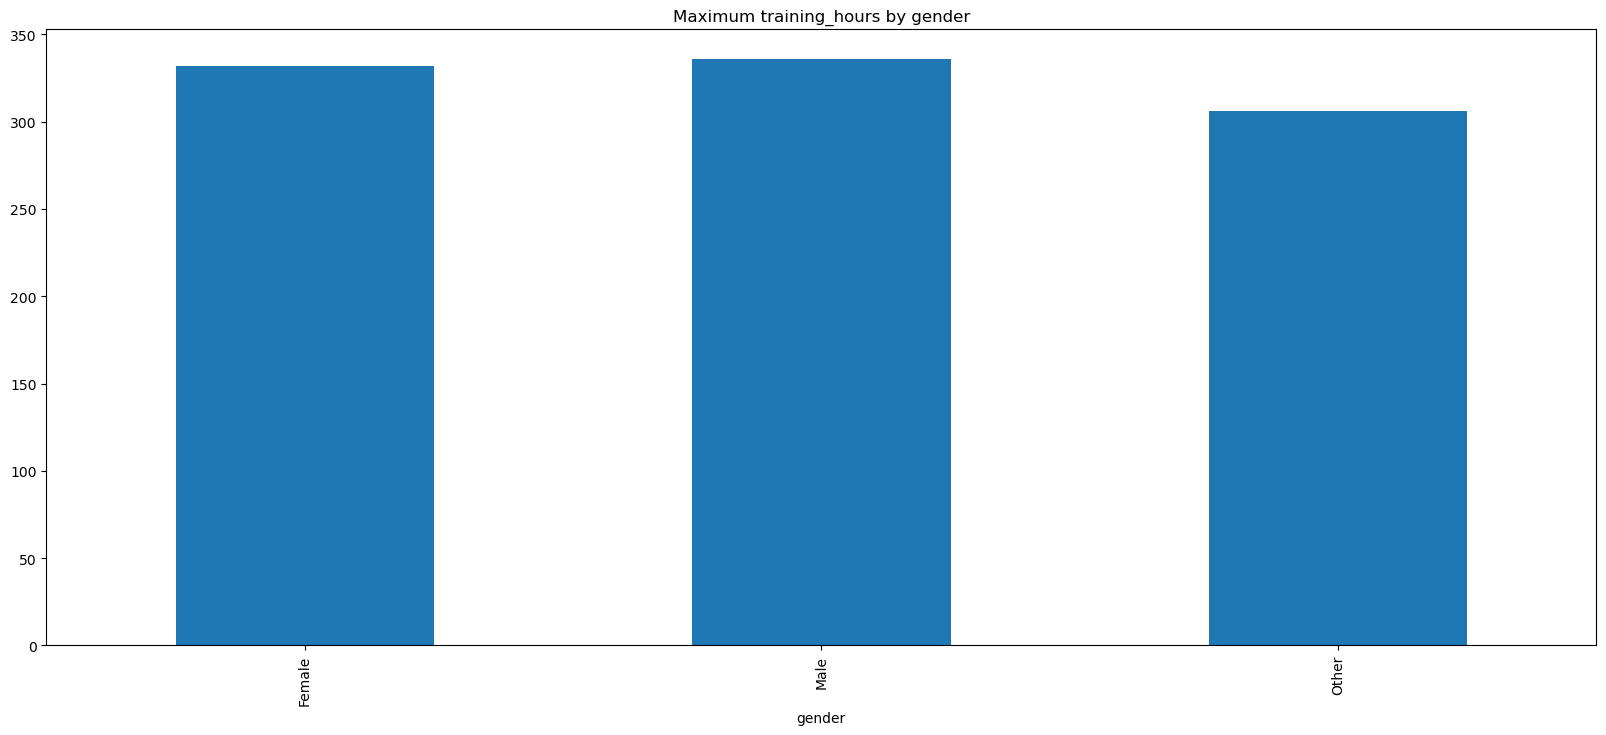

In [49]:
max.plot(kind='bar', x='gender')
plt.rcParams['figure.figsize']=[5,5]
plt.title("Maximum training_hours by gender")
plt.show()

20. Heatmap: training_hours by target and company_size

In [50]:
a=df.groupby(['target','company_size'])['training_hours'].mean().unstack()
a

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
target,,,,,,,,
0.0,68.758651,63.75000,63.765957,64.630967,67.261787,65.536552,65.544469,66.947417
1.0,60.921512,65.20241,69.445000,64.067532,63.101184,58.302632,60.019608,60.258929


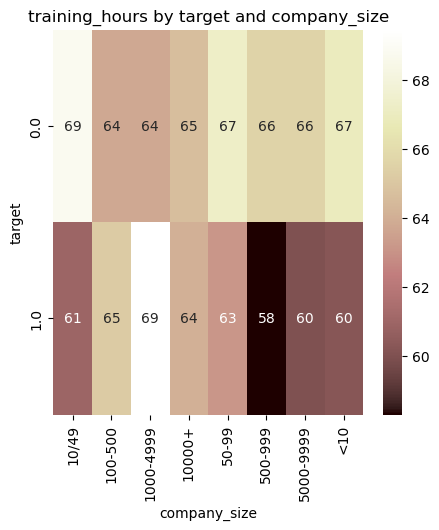

In [51]:
sns.heatmap(a, annot=True, cmap='pink')
plt.title('training_hours by target and company_size')
plt.show()

21. Count people per major discipline and gender, shown as heatmap.

In [52]:
b=df.groupby(['major_discipline','gender'])['gender'].count().unstack()
b

gender,Female,Male,Other
major_discipline,,,
Arts,36,210,7
Business Degree,25,299,3
Humanities,118,543,8
No Major,16,204,3
Other,36,338,7
STEM,1007,16135,163


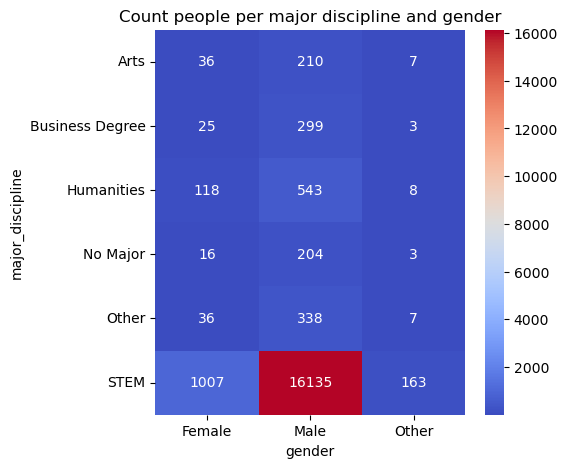

In [53]:
sns.heatmap(b, annot=True, fmt='d', cmap='coolwarm')
plt.title('Count people per major discipline and gender')
plt.show()

22. Compare std of city index for each education level using horizontal bar chart.

In [54]:
c=df.groupby(['education_level'])['city_development_index'].std().sort_values()
c

education_level
Phd               0.081334
Primary School    0.111571
Masters           0.115828
High School       0.118761
Graduate          0.127503
Name: city_development_index, dtype: float64

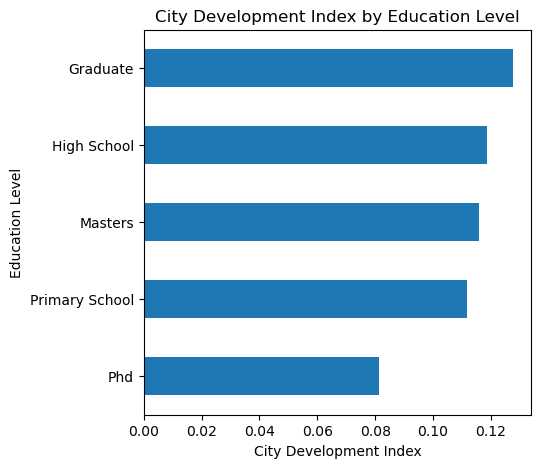

In [55]:
c.plot(kind='barh')
plt.xlabel('City Development Index')
plt.ylabel('Education Level')
plt.title('City Development Index by Education Level')
plt.show()

23. Visualize average job change rate by experience using a line plot.

In [56]:
df['target'].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [57]:
exp=df.groupby('experience')['target'].value_counts().unstack()
exp

target,0.0,1.0
experience,,
1,316,233
10,778,207
11,513,151
12,402,92
13,322,77
14,479,107
15,572,114
16,436,72
17,285,57


In [58]:
job_change=exp[[1.0]]
job_change

target,1.0
experience,
1,233
10,207
11,151
12,92
13,77
14,107
15,114
16,72
17,57


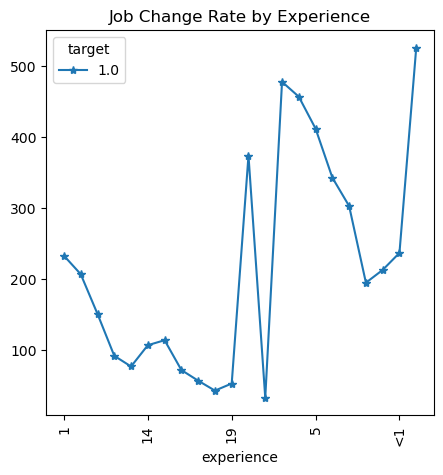

In [59]:
job_change.plot(marker="*")
plt.title("Job Change Rate by Experience")
plt.xticks(rotation=90)
plt.show()

24. Pivot training_hours by education and target, heatmap the result.

In [61]:
pivot_table=pd.pivot_table(df, values='training_hours', index='education_level', columns='target')
pivot_table

target,0.0,1.0
education_level,,
Graduate,66.742450,63.621380
High School,66.619840,66.931472
Masters,64.073847,60.328342
Phd,68.379213,62.275862
Primary School,65.685393,50.219512


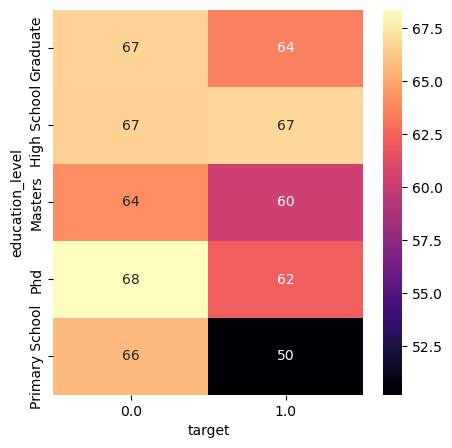

In [62]:
sns.heatmap(pivot_table, annot=True, cmap='magma')
plt.rcParams['figure.figsize']=[10,5]

25. Crosstab of gender vs target, bar plot with Seaborn.

In [79]:
cross_tabs = pd.crosstab(df['gender'], df['target'], normalize='index')
cross_tabs

target,0.0,1.0
gender,,
Female,0.736672,0.263328
Male,0.751763,0.248237
Other,0.738220,0.261780


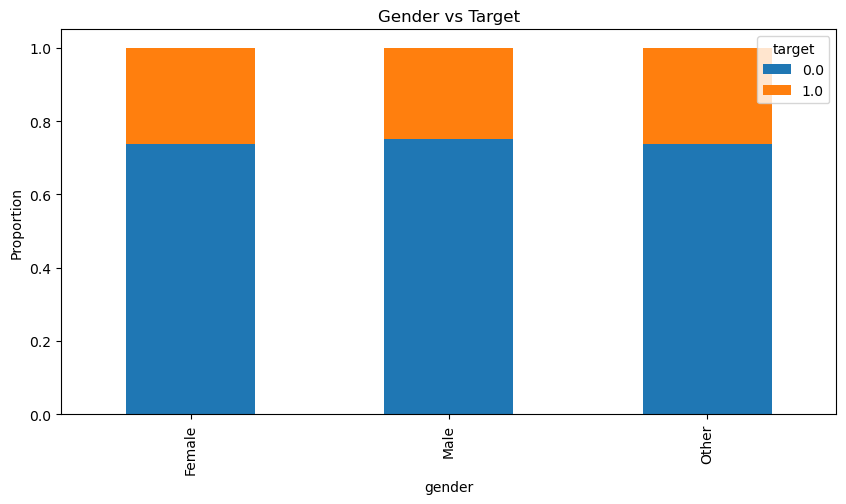

In [80]:
cross_tabs.plot(kind='bar', stacked=True) #using sns stacked bar chart is not possible
plt.title("Gender vs Target")
plt.ylabel("Proportion")
plt.show()

26. Use unstack to analyze gender & enrolled_university and heatmap.

In [84]:
x=df.groupby(['gender','enrolled_university']).size().unstack()
x

enrolled_university,Full time course,Part time course,no_enrollment
gender,,,
Female,216,65,957
Male,3493,1115,13121
Other,48,18,125


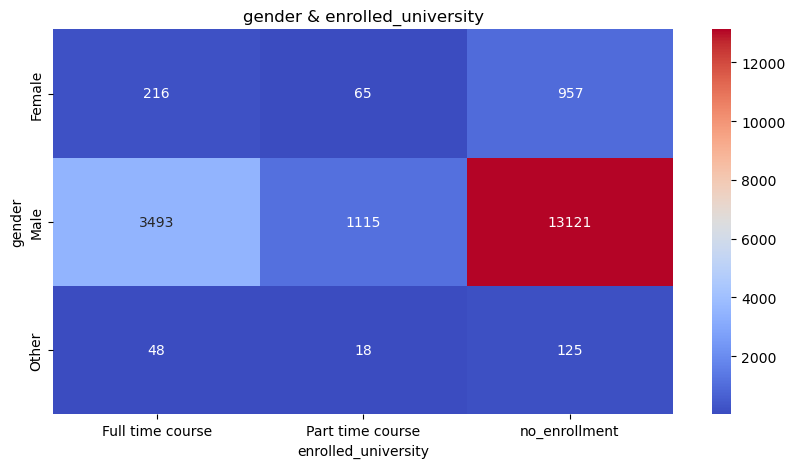

In [86]:
sns.heatmap(x, annot=True, fmt='d',cmap='coolwarm')
plt.title('gender & enrolled_university')
plt.show()

27. Violin plot of training hours by education level.

<Axes: xlabel='education_level', ylabel='training_hours'>

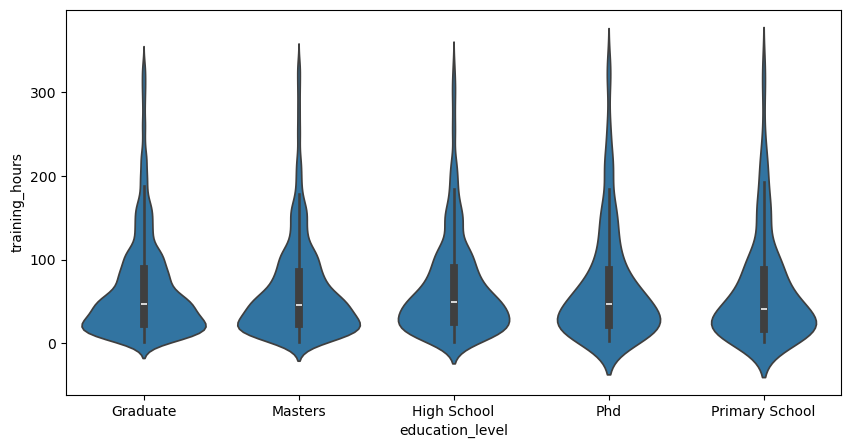

In [95]:
sns.violinplot(data=df, x='education_level', y='training_hours')

28. Histogram of city index by job change target.

In [97]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

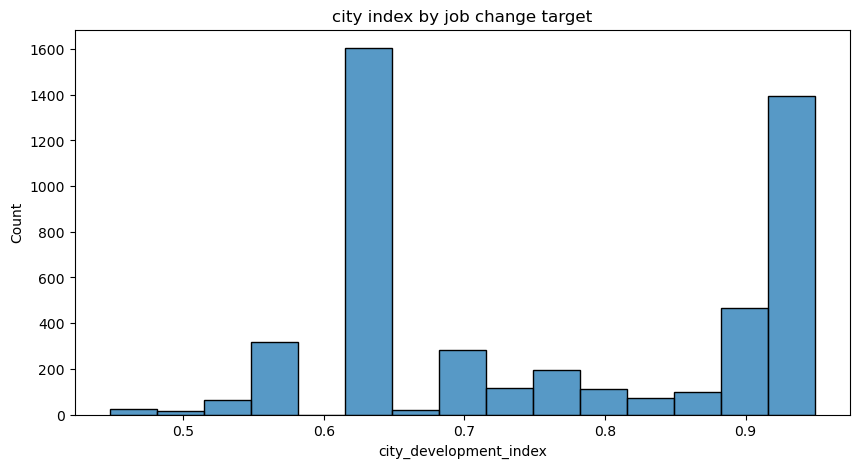

In [102]:
sns.histplot(df[df['target']==1], x='city_development_index')
plt.title('city index by job change target')
plt.show()

30. Stripplot of training hours by company type.

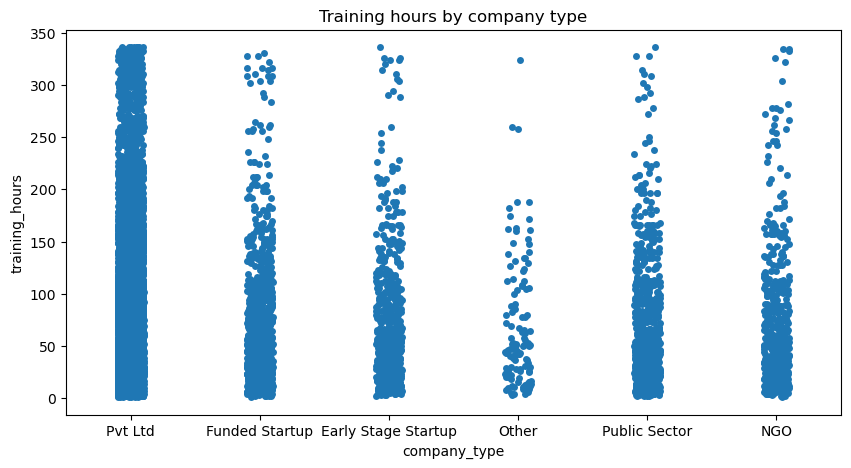

In [112]:
sns.stripplot(data=df, x='company_type', y='training_hours')
plt.title("Training hours by company type")
plt.show()